<a href="https://colab.research.google.com/github/jeongukjae/pytorch-tutorial/blob/master/ch3/2_mnist_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST with PyTorch

(Feedforward NN)

In [0]:
import torch

from torch import nn, optim
from torch.nn import functional
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset, random_split

from torchvision import datasets, transforms

from sklearn import model_selection

from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline

In [0]:
# load mnist data
mnist_train = datasets.MNIST('./mnist-data',
                       download=True,
                       train=True,
                       transform=transforms.ToTensor())
mnist_test = datasets.MNIST('./mnist-data',
                       download=True,
                       train=False,
                       transform=transforms.ToTensor())

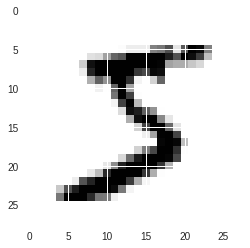

In [3]:
# show mnist data
plt.imshow(mnist_train.data[0], cmap=cm.gray_r)
plt.show()

In [4]:
print(f"total size of mnist training data: {mnist_train.data.shape}")
print(f"total size of mnist testing data: {mnist_test.data.shape}")

packed_train_data = DataLoader(mnist_train, batch_size=100, shuffle=True)

total size of mnist training data: torch.Size([60000, 28, 28])
total size of mnist testing data: torch.Size([10000, 28, 28])


In [0]:
class Neuralnet(nn.Module):
  def __init__(self):
    super(Neuralnet, self).__init__()
    self.fully_connected1 = nn.Linear(784, 512) # 28 * 28
    self.fully_connected2 = nn.Linear(512, 512)
    self.fully_connected3 = nn.Linear(512, 256)
    self.fully_connected4 = nn.Linear(256, 256)
    self.fully_connected5 = nn.Linear(256, 10)

  def forward(self, input):
    x = functional.relu(self.fully_connected1(input))
    x = functional.relu(self.fully_connected2(x))
    x = functional.relu(self.fully_connected3(x))
    x = functional.relu(self.fully_connected4(x))
    x = functional.dropout(x, training=self.training)
    return functional.log_softmax(self.fully_connected5(x), dim=1)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Neuralnet().to(device)

print(f"is gpu?: {torch.cuda.is_available()}")

is gpu?: True


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(20):
  total_loss = 0
  
  for train_x, train_y in packed_train_data:
    train_x = train_x.reshape(-1, 28*28).to(device)
    train_y = train_y.to(device)
    optimizer.zero_grad()
    
    output = model(train_x)
    
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    
    total_loss += loss.data.item()
  
  print(f"epoch {epoch + 1}, loss: {total_loss}")

epoch 1, loss: 1379.136223077774
epoch 2, loss: 1369.2813124656677
epoch 3, loss: 1299.5392643213272
epoch 4, loss: 790.519590318203
epoch 5, loss: 445.13306429982185
epoch 6, loss: 341.5683365762234
epoch 7, loss: 285.27935215830803
epoch 8, loss: 247.27432598173618
epoch 9, loss: 219.83317589759827
epoch 10, loss: 196.67304426431656
epoch 11, loss: 177.0175697132945
epoch 12, loss: 159.96051914989948
epoch 13, loss: 145.54210218787193
epoch 14, loss: 133.178013343364
epoch 15, loss: 121.89515858143568
epoch 16, loss: 111.52036279439926
epoch 17, loss: 103.6888063699007
epoch 18, loss: 96.67028532549739
epoch 19, loss: 89.94248128682375
epoch 20, loss: 85.2397886570543


In [0]:
x = mnist_test.data
y = mnist_test.targets

x = x.reshape(-1, 28 * 28).float().to(device)

result = torch.max(model(x), 1)[1]
accuracy = sum(y.data.numpy() == result.detach().cpu().numpy()) / len(y.data.numpy())

In [9]:
print(f"accuracy: {accuracy}")

accuracy: 0.9547
